In [4]:
!pip install opencv-python matplotlib scikit-image numpy


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\juanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importar librerías

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import colorsys

Cargar imagen y mostrarla en RGB

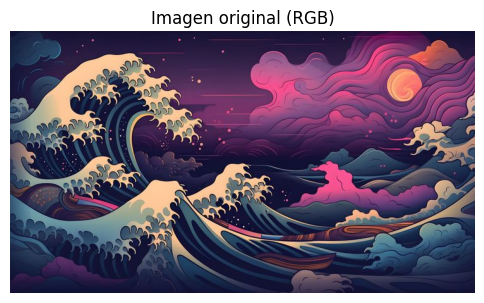

In [5]:
# Cargar imagen (usa una imagen local o una URL descargada previamente)
img_bgr = cv2.imread('Datos/imagen.jpg')  # Asegúrate de que esté en el mismo directorio
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # Convertir a RGB para visualizar correctamente

# Mostrar imagen original
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Imagen original (RGB)")
plt.axis('off')
plt.show()

Convertir de RGB a HSV

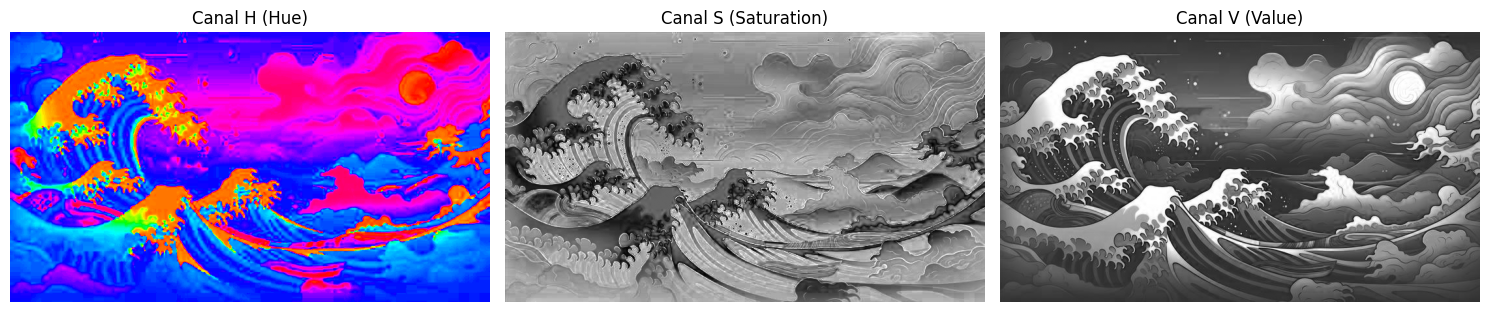

In [7]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Mostrar canales H, S, V por separado
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(h, cmap='hsv')
axs[0].set_title("Canal H (Hue)")
axs[1].imshow(s, cmap='gray')
axs[1].set_title("Canal S (Saturation)")
axs[2].imshow(v, cmap='gray')
axs[2].set_title("Canal V (Value)")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

Convertir de RGB a CIE Lab

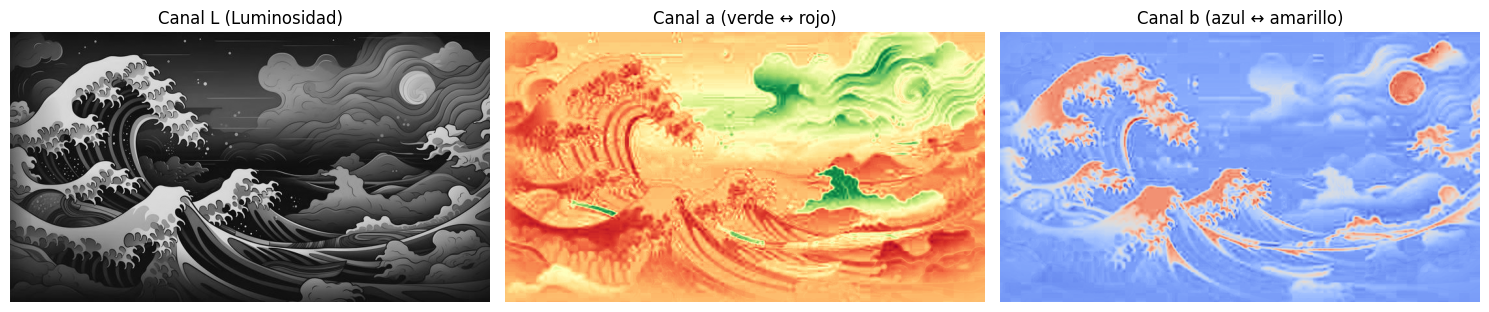

In [8]:
img_rgb_float = img_rgb / 255.0  # Normalizar a [0, 1] para skimage
img_lab = color.rgb2lab(img_rgb_float)

L, a, b = img_lab[:, :, 0], img_lab[:, :, 1], img_lab[:, :, 2]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(L, cmap='gray')
axs[0].set_title("Canal L (Luminosidad)")
axs[1].imshow(a, cmap='RdYlGn')
axs[1].set_title("Canal a (verde ↔ rojo)")
axs[2].imshow(b, cmap='coolwarm')
axs[2].set_title("Canal b (azul ↔ amarillo)")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

Simulación de daltonismo

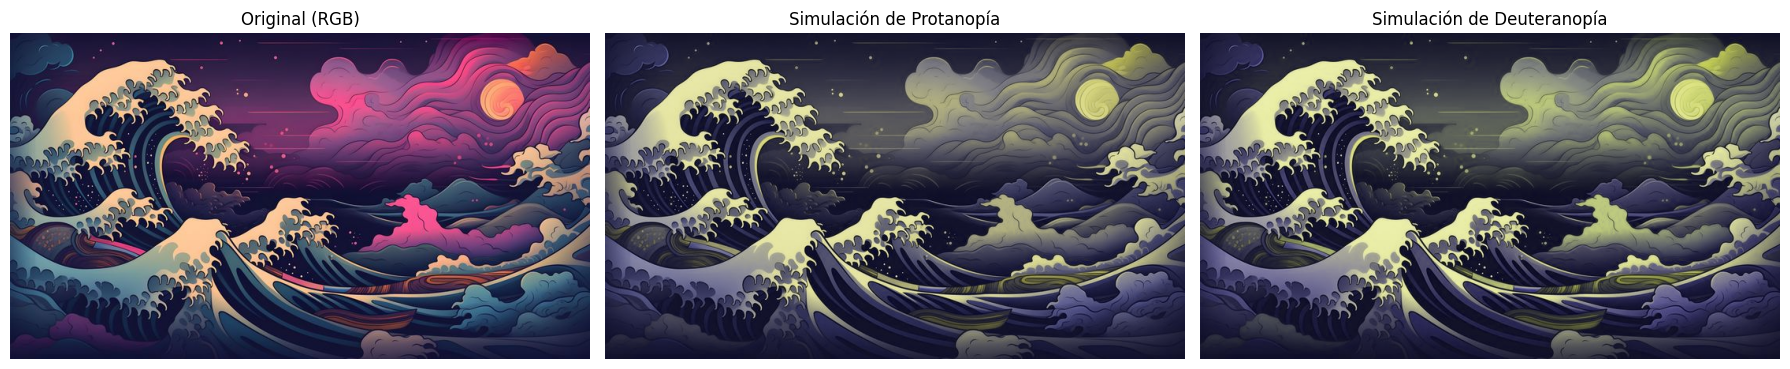

In [10]:
def simulate_colorblindness(img_rgb, matrix):
    img_float = img_rgb.astype(float) / 255.0  # Normalizar a [0, 1]
    img_reshaped = img_float.reshape((-1, 3)).T  # Transpuesta para multiplicación
    altered = np.dot(matrix, img_reshaped).T  # Aplicar la matriz
    altered = altered.reshape(img_rgb.shape)
    altered = np.clip(altered, 0, 1)  # Limitar a rango válido
    return (altered * 255).astype(np.uint8)

# Matriz para protanopía (falta de conos rojos)
protanopia_matrix = np.array([
    [0.567, 0.433, 0.000],
    [0.558, 0.442, 0.000],
    [0.000, 0.242, 0.758]
])

# Matriz para deuteranopía (falta de conos verdes)
deuteranopia_matrix = np.array([
    [0.625, 0.375, 0.000],
    [0.700, 0.300, 0.000],
    [0.000, 0.300, 0.700]
])

# Simular y mostrar
protanopia_img = simulate_colorblindness(img_rgb, protanopia_matrix)
deuteranopia_img = simulate_colorblindness(img_rgb, deuteranopia_matrix)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(img_rgb)
axs[0].set_title("Original (RGB)")
axs[1].imshow(protanopia_img)
axs[1].set_title("Simulación de Protanopía")
axs[2].imshow(deuteranopia_img)
axs[2].set_title("Simulación de Deuteranopía")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

Simulación de condiciones de baja luz (brillo/contraste)

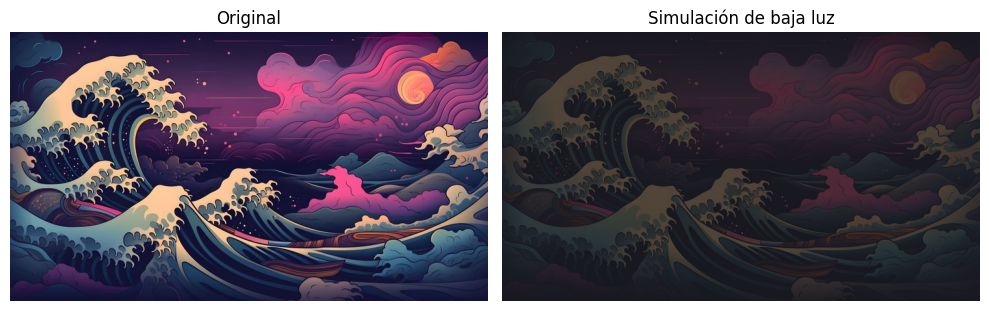

In [11]:
def simulate_low_light(img, brightness_factor=0.4, contrast_factor=0.6):
    img_float = img.astype(float) / 255.0
    # Contraste: alejar de 0.5 y ajustar brillo
    img_adjusted = contrast_factor * (img_float - 0.5) + 0.5
    img_adjusted *= brightness_factor
    img_adjusted = np.clip(img_adjusted, 0, 1)
    return (img_adjusted * 255).astype(np.uint8)

low_light_img = simulate_low_light(img_rgb)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(low_light_img)
plt.title("Simulación de baja luz")
plt.axis('off')

plt.tight_layout()
plt.show()


Filtro de temperatura de color (cálido y frío)

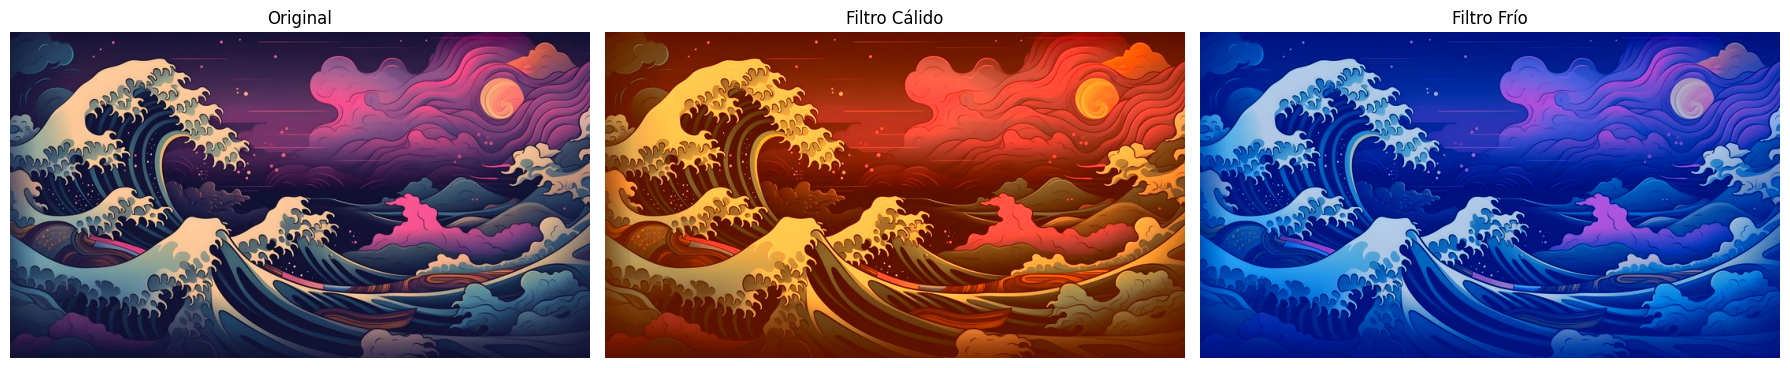

In [13]:
def apply_temperature_filter(img, warmth=0.2):
    """
    warmth > 0: tono cálido (más rojo/menos azul)
    warmth < 0: tono frío (más azul/menos rojo)
    """
    img_float = img.astype(np.float32) / 255.0
    r, g, b = img_float[:, :, 0], img_float[:, :, 1], img_float[:, :, 2]

    r = np.clip(r + warmth, 0, 1)
    b = np.clip(b - warmth, 0, 1)

    img_filtered = np.stack((r, g, b), axis=2)
    return (img_filtered * 255).astype(np.uint8)

warm_img = apply_temperature_filter(img_rgb, warmth=0.3)
cold_img = apply_temperature_filter(img_rgb, warmth=-0.3)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(img_rgb)
axs[0].set_title("Original")
axs[1].imshow(warm_img)
axs[1].set_title("Filtro Cálido")
axs[2].imshow(cold_img)
axs[2].set_title("Filtro Frío")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

Inversión de colores (efecto negativo)

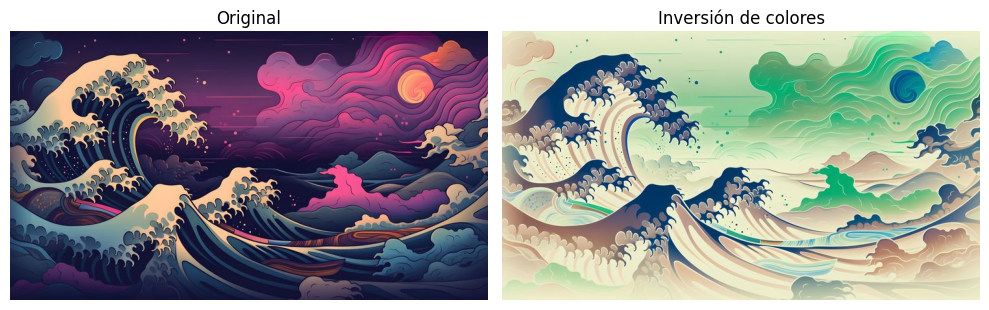

In [14]:
def invert_colors(img):
    return 255 - img

inverted_img = invert_colors(img_rgb)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inverted_img)
plt.title("Inversión de colores")
plt.axis('off')

plt.tight_layout()
plt.show()

Monocromo (escala de grises personalizada)

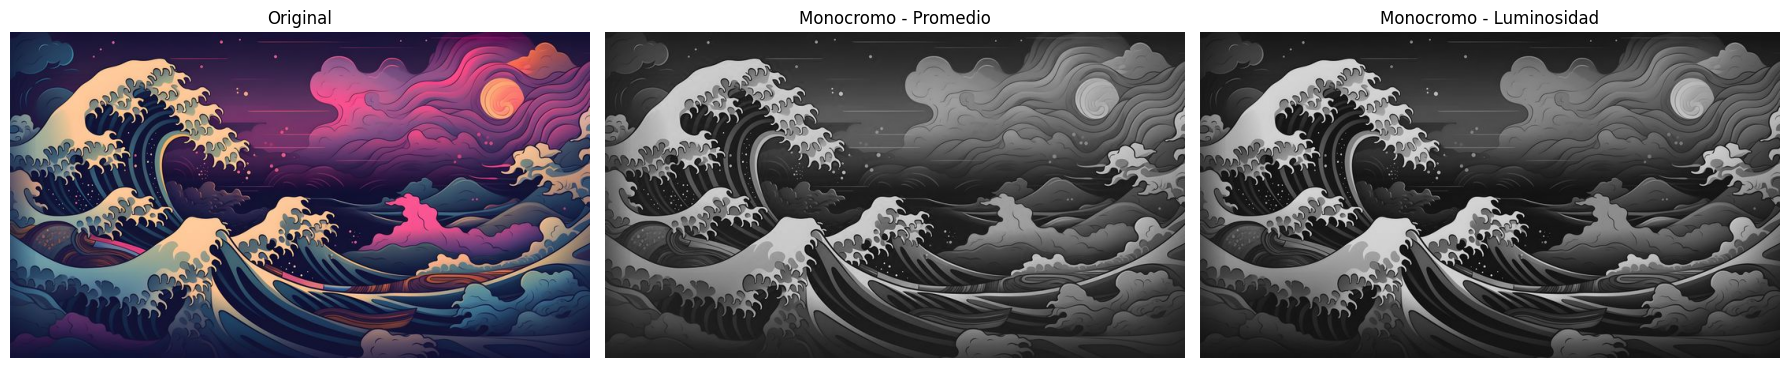

In [15]:
def to_monochrome(img, method='average'):
    if method == 'average':
        gray = img.mean(axis=2)
    elif method == 'luminosity':
        gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
    else:
        raise ValueError("Método no reconocido: usa 'average' o 'luminosity'")
    
    return np.stack([gray]*3, axis=2).astype(np.uint8)

mono_avg = to_monochrome(img_rgb, 'average')
mono_lum = to_monochrome(img_rgb, 'luminosity')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(img_rgb)
axs[0].set_title("Original")
axs[1].imshow(mono_avg)
axs[1].set_title("Monocromo - Promedio")
axs[2].imshow(mono_lum)
axs[2].set_title("Monocromo - Luminosidad")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

Bonus

In [20]:
pip install ipywidgets jupyter nbextension enable --py widgetsnbextension


Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\juanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\juanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\juanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\juanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\juanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <archive url/path> ...

ambiguous option: --py (--pypi-url, --python, --python-version?)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Lista de modos disponibles
mode_options = [
    "original",
    "protanopia",
    "deuteranopia",
    "low_light",
    "invert",
    "warm",
    "cold",
    "mono_avg",
    "mono_lum"
]

# Menú desplegable
mode_selector = widgets.Dropdown(
    options=mode_options,
    value="original",
    description="Modo:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px')
)

# Área de salida
output = widgets.Output()


def update_image(change):
    with output:
        clear_output(wait=True)
        simulated = apply_simulation(img_rgb, mode=change['new'])
        plt.imshow(simulated)
        plt.title(f"Vista simulada: {change['new']}")
        plt.axis('off')
        plt.show()

mode_selector.observe(update_image, names='value')


In [22]:
display(mode_selector)
display(output)

# Mostrar la imagen original inicialmente
with output:
    plt.imshow(img_rgb)
    plt.title("Vista simulada: original")
    plt.axis('off')
    plt.show()



Dropdown(description='Modo:', layout=Layout(width='300px'), options=('original', 'protanopia', 'deuteranopia',…

Output()